### EXP 1. Identify the problems in data set and perform Data Wrangling {data set will be provided}


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\sojwa\Downloads\tips.csv")
df.head()
df.tail()
df.describe()

df=df.merge(df2)
df.info()
df.isnull().sum()
del df['size']  #deleting a column
df=df.fillna(0) #to fill na values to 0
df["sex"] = df["sex"]. replace(["Female", "Male"], ["F", "M"]) #replacing values in a column
df['money paid'] = df['tip'] + df['total_bill']   #creating new column





### EXP2.Data visualisation of given data set with Inference
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\sojwa\Downloads\tips.csv")
df.head()
sns.scatterplot(x='column1', y='column2', data=df)
sns.boxplot(x='category_column', y='numeric_column', data=df)
sns.histplot(df['column'], bins=20, kde=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
sns.swamplot(data=df,x="",y="")
sns.distplot
sns.lmplot


Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 7059.04362190151
R-squared Score: 0.9024461774180497


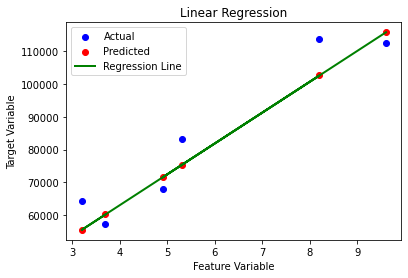

In [72]:
### Exp3.Performance and Linear/Nonlinear regression on suitable data set.


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target_column' is the column you want to predict
# Splitting the data into features (X) and target variable (y)
X = df[['YearsExperience']]  # Feature variable
y = df['Salary']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

# Extracting values from DataFrame columns
X_test_values = X_test.values.ravel()
y_test_values = y_test.values.ravel()
y_pred_values = y_pred.ravel()

# Plotting both actual and predicted data points
plt.scatter(X_test_values, y_test_values, color='blue', label='Actual')  # Actual data points
plt.scatter(X_test_values, y_pred_values, color='red', label='Predicted')  # Predicted data points

# Plotting the regression line
plt.plot(X_test_values, y_pred_values, color='green', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Feature Variable')
plt.ylabel('Target Variable')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()

Mean Squared Error: 52527916.36877494
Root Mean Squared Error: 7247.6145295383185
R-squared Score: 0.8971645780890871


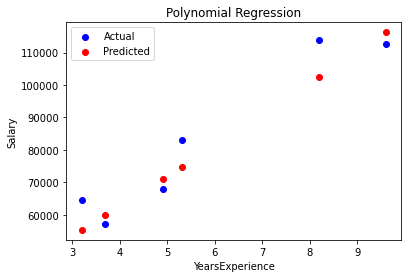

In [73]:
#Exp3 - Non linear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'target_column' is the column you want to predict
# Splitting the data into features (X) and target variable (y)
X = df[['YearsExperience']]  # Feature variable
y = df['Salary']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 10  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating a polynomial regression model
model = LinearRegression()

# Training the model on the polynomial features
model.fit(X_train_poly, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

# Plotting the actual vs. predicted data points
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted')  # Predicted data points

# Plotting the regression line
X_test_poly_line = poly_features.transform(X_test.sort_values(by='YearsExperience'))
X_test_sorted = X_test.sort_values(by='YearsExperience')
plt.plot(X_test_sorted['YearsExperience'], model.predict(X_test_poly_line), color='green', label='Regression Line')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


Ridge Regression:
Mean Squared Error: 49899443.65426665
Root Mean Squared Error: 7063.953825887217
R-squared Score: 0.9023104151841687

Lasso Regression:
Mean Squared Error: 49830265.68574235
Root Mean Squared Error: 7059.055580298426
R-squared Score: 0.9024458468949982


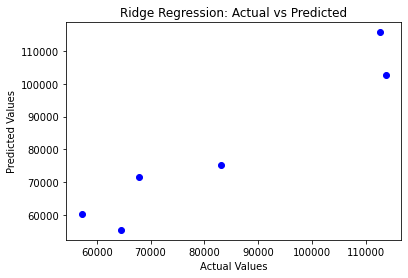

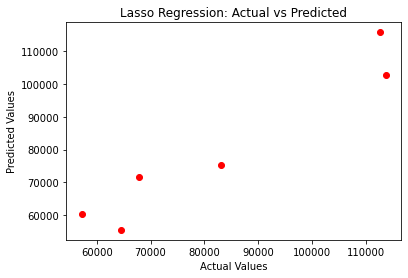

In [49]:
### Exp4.Performance of Regularisation technique {Ridge /Lasso} regression.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target_column' is the column you want to predict
# Splitting the data into features (X) and target variable (y)
X = df[['YearsExperience']]  # Feature variable
y = df['Salary']  # Target variable


# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training Ridge regression model
ridge_model = Ridge(alpha=0.5)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Creating and training Lasso regression model
lasso_model = Lasso(alpha=0.5)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Making predictions on the test data for Ridge and Lasso models
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared Score:", r2_ridge)

# Evaluating the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared Score:", r2_lasso)

# Plotting actual vs predicted values for Ridge regression
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plotting actual vs predicted values for Lasso regression
plt.scatter(y_test, y_pred_lasso, color='red')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
###Exp5 Performance of Logistics Regression for binary class problem.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming df is your DataFrame where 'target_column' is the binary target variable
# Splitting the data into features (X) and target variable (y)
X = df.drop('target_column', axis=1)  # Features
y = df['target_column']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
#Exp6 Performance of Bayesian Classification for classification problem.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame where 'target_column' is the target variable
# Splitting the data into features (X) and target variable (y)
X = df.drop('target_column', axis=1)  # Features
y = df['target_column']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = nb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




#Exp 6 2nd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

ds=pd.read_csv('SALARY DATA - SALARY DATA.csv')
ds.head()

ds['Purchased'].unique()

x=ds.iloc[:,[2,3]].values

y=ds.iloc[:,4].values


from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
print(ytrain)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)
print(xtrain[0:10])

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(xtrain,ytrain)


y_pred=classifier.predict(xtest)
y_pred

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print('Confusion Matrix: \n',cm)

from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(ytest,y_pred))

## Plotting

from matplotlib.colors import ListedColormap
x_set,y_set=xtest,ytest

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming classifier is already defined

x_set, y_set = xtest, ytest

# Create a mesh grid
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

# Contour plot
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

# Add labels and legend
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming ds is your DataFrame
# input
x = ds.iloc[:, [2, 3]].values  # Age and EstimatedSalary
# output
y = ds.iloc[:, 4].values  # Purchased

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)
print(ytrain)

# Standardization
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print(xtrain[0:10])


import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Training the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

# Visualizing the decision boundary
x1_min, x1_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
x2_min, x2_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for i, j in enumerate(np.unique(ytrain)):
    plt.scatter(xtrain[ytrain == j, 0], xtrain[ytrain == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes Classifier Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\sojwa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


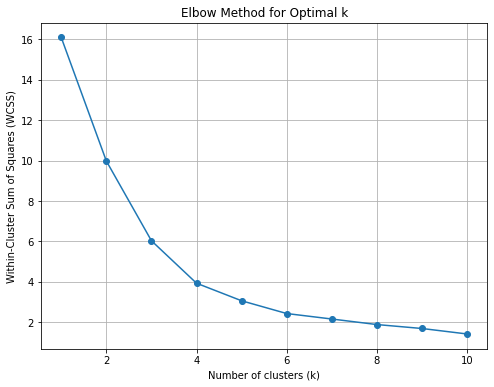

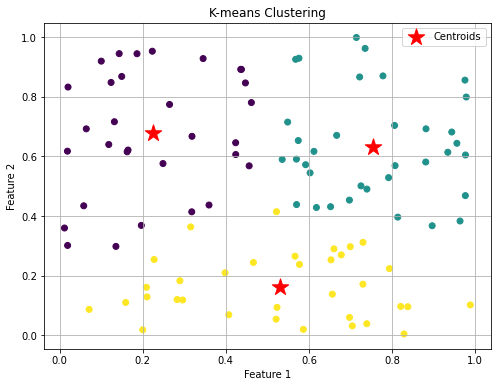

In [60]:
#Exp7 Performance of k-means clustering
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Perform K-means clustering
k_values = range(1, 11)  # Range of k values to try
inertia = []  # List to store the inertia (WCSS) for each k value

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choose the optimal k based on the elbow plot
optimal_k = 3  # Choose the number of clusters based on the elbow point

# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sojwa\AppData\Local\Temp\ipykernel_18456\3238924549.py:48: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


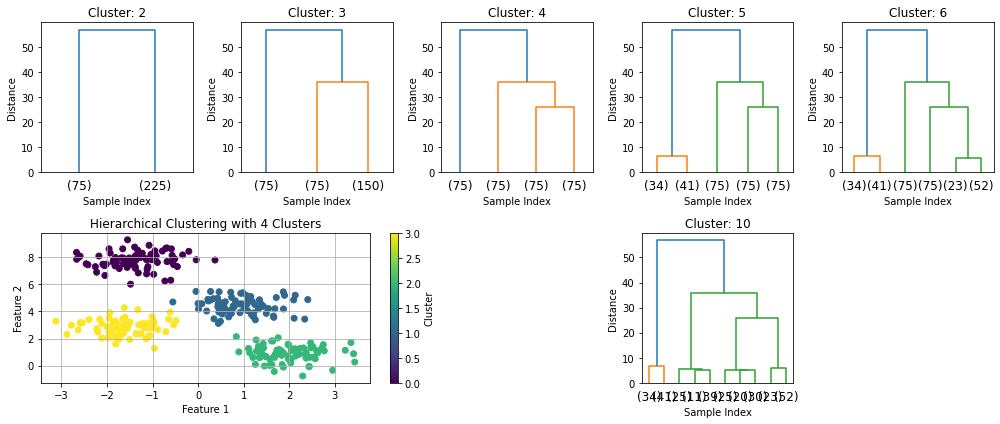

In [63]:
#Exp8-Performance of Hierarchical Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform Hierarchical Clustering
n_clusters_range = range(2, 11)
silhouette_scores = []

plt.figure(figsize=(14, 6))

for i, n_clusters in enumerate(n_clusters_range, start=1):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Plot dendrogram
    plt.subplot(2, 5, i)
    plt.title(f'Cluster: {n_clusters}')
    linkage_matrix = linkage(X, 'ward')
    dendrogram(linkage_matrix, p=n_clusters, truncate_mode='lastp')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.tight_layout()

# Choose the optimal number of clusters based on silhouette score
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

# Perform Hierarchical Clustering with optimal number of clusters
model = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels = model.fit_predict(X)

# Plot clustered data points
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering with {optimal_n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


Training Set Accuracy: 0.8233333333333334
Test Set Accuracy: 0.9
Training Set Precision: 0.8222222222222222
Training Set Recall: 0.6666666666666666
Training Set F1 Score: 0.7363184079601989
Test Set Precision: 0.9230769230769231
Test Set Recall: 0.75
Test Set F1 Score: 0.8275862068965517


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


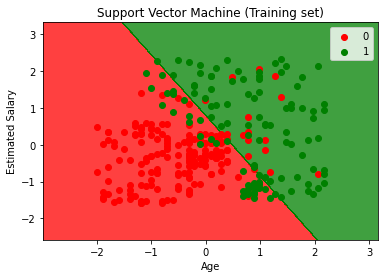

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


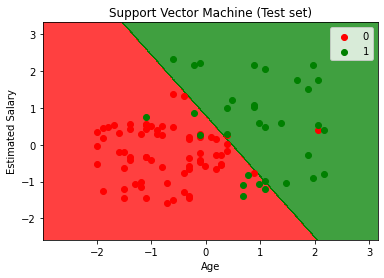

In [66]:
#Exp9 -Performance of SVM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
datasets = pd.read_csv(r"C:\Users\sojwa\Downloads\Social_Network_Ads.csv")
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Calculating accuracy on training set
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_Train, classifier.predict(X_Train))
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy on test set
test_accuracy = accuracy_score(Y_Test, Y_Pred)
print("Test Set Accuracy:", test_accuracy)

# Calculating precision, recall, and F1 score for training set
from sklearn.metrics import precision_score, recall_score, f1_score
train_precision = precision_score(Y_Train, classifier.predict(X_Train))
train_recall = recall_score(Y_Train, classifier.predict(X_Train))
train_f1 = f1_score(Y_Train, classifier.predict(X_Train))

print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1)

# Calculating precision, recall, and F1 score for test set
test_precision = precision_score(Y_Test, Y_Pred)
test_recall = recall_score(Y_Test, Y_Pred)
test_f1 = f1_score(Y_Test, Y_Pred)

print("Test Set Precision:", test_precision)
print("Test Set Recall:", test_recall)
print("Test Set F1 Score:", test_f1)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


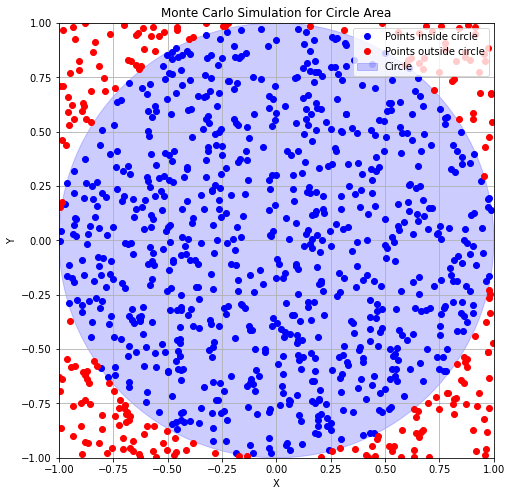

Estimated area (Monte Carlo simulation): 3.112
Theoretical area: 3.141592653589793


In [68]:
#exp9 monte carlo for area calculation

import numpy as np
import matplotlib.pyplot as plt

def circle_area(radius, n_samples):
    # Generate random points within a square enclosing the circle
    x = np.random.uniform(low=-radius, high=radius, size=n_samples)
    y = np.random.uniform(low=-radius, high=radius, size=n_samples)
    
    # Count the number of points inside the circle
    inside_circle = (x**2 + y**2) <= radius**2
    
    # Estimate the area based on the fraction of points inside the circle
    area_square = (2 * radius)**2
    area_circle = area_square * np.sum(inside_circle) / n_samples
    
    return area_circle, x, y, inside_circle

# Parameters
radius = 1.0
n_samples = 1000

# Perform Monte Carlo simulation
estimated_area, x, y, inside_circle = circle_area(radius, n_samples)

# Theoretical calculation
theoretical_area = np.pi * radius**2

# Plot the circle, square, and random points
plt.figure(figsize=(8, 8))
plt.plot(x[inside_circle], y[inside_circle], 'bo', label='Points inside circle')
plt.plot(x[~inside_circle], y[~inside_circle], 'ro', label='Points outside circle')
circle = plt.Circle((0, 0), radius, color='blue', alpha=0.2, label='Circle')
plt.gca().add_patch(circle)
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Monte Carlo Simulation for Circle Area')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated area (Monte Carlo simulation):", estimated_area)
print("Theoretical area:", theoretical_area)



In [69]:
#Exp 10 Monte carlo simulation for probability theory
1.Cards

import numpy as np

def monte_carlo_probability(color_to_find, colors, n_draws):
    count_color = 0
    
    for _ in range(n_draws):
        drawn_card = np.random.choice(colors)
        if drawn_card == color_to_find:
            count_color += 1
    
    probability = count_color / n_draws
    return probability

# Parameters
color_to_find = 'red'  # Color to find
colors = ['red', 'blue', 'green', 'yellow']  # Available colors
n_draws = 10000  # Number of draws

# Perform Monte Carlo simulation
probability = monte_carlo_probability(color_to_find, colors, n_draws)

print(f"The estimated probability of drawing a {color_to_find} card is: {probability}")


The estimated probability of drawing a red card is: 0.2481


In [70]:
#Exp10
#2.Probability of getting a H or T in a coin flip
import numpy as np

def monte_carlo_coin_probability(n_flips):
    count_H = 0
    count_T = 0
    
    for _ in range(n_flips):
        outcome = np.random.choice(['H', 'T'])
        if outcome == 'H':
            count_H += 1
        else:
            count_T += 1
    
    probability_H = count_H / n_flips
    probability_T = count_T / n_flips
    
    return probability_H, probability_T

# Parameters
n_flips = 10000  # Number of coin flips

# Perform Monte Carlo simulation
probability_H, probability_T = monte_carlo_coin_probability(n_flips)

print(f"The estimated probability of getting a head (H): {probability_H}")
print(f"The estimated probability of getting a tail (T): {probability_T}")


The estimated probability of getting a head (H): 0.5035
The estimated probability of getting a tail (T): 0.4965


In [71]:
#Exp10 
#3Probability of getting a any one no. While rolling the dice
import numpy as np

def monte_carlo_dice_probability(n_rolls):
    count_one = 0
    
    for _ in range(n_rolls):
        outcome = np.random.randint(1, 7)  # Rolling a fair six-sided dice
        if outcome == 1:
            count_one += 1
    
    probability_one = count_one / n_rolls
    
    return probability_one

# Parameters
n_rolls = 10000  # Number of dice rolls

# Perform Monte Carlo simulation
probability_one = monte_carlo_dice_probability(n_rolls)

print(f"The estimated probability of getting a one: {probability_one}")


The estimated probability of getting a one: 0.1664
